# Models
***

## Exercise 2.1  
*__Use numpy and matplotlib to plot the absolute value function.__*

NOTE: copied a lot from Ian's example in here just to keep me on track as I worked through these exercises - will remove them once I'm happy with what I've done.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

First, let's simulate some data as per Ian's example.

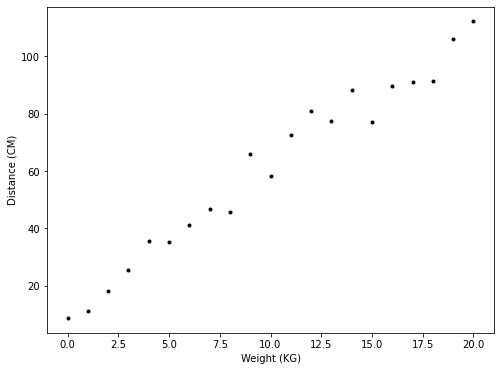

In [2]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

# plotting the data
plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

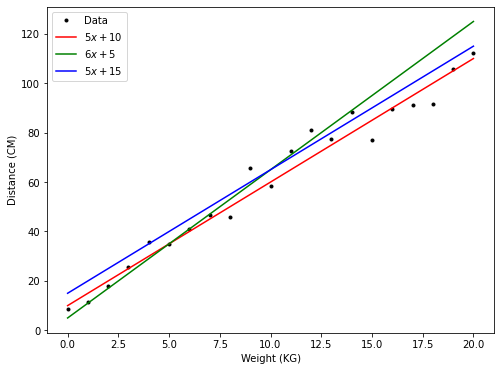

In [3]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

The absolute value function uses the following formula:  
$\mid y_i - m x_i - c \mid$

In [28]:
# Calculate the absolute cost value for the data above
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c) for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, abs(cost(5.0, 10.0))))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, abs(cost(6.0,  5.0))))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, abs(cost(5.0, 15.0))))

Cost with m =  5.00 and c = 10.00:    18.61
Cost with m =  6.00 and c =  5.00:    86.39
Cost with m =  5.00 and c = 15.00:    86.39


In [18]:
# creating a list to store each result of the absolute value function (not summed)
abs_values = []

# seting m & c values based on Ian's example
m, c = 5.00, 10.00 
for i in range(w.size):
    result = (d[i] - m * w[i] - c)
    abs_values.append(result)
    
abs_values

[-1.2495615964148268,
 -3.7053056658132935,
 -2.004972873639005,
 0.45831673287692354,
 5.63214889890812,
 0.11259513263519239,
 1.1768979818540473,
 1.8119802408378476,
 -4.317816927822882,
 10.789203898555016,
 -1.5665652470535036,
 7.44964143888555,
 10.910010709975438,
 2.424791732354251,
 8.243105489192317,
 -8.032309645290766,
 -0.22995115011418932,
 -3.8674974081494327,
 -8.476335657307658,
 0.8992162663951007,
 2.1535539918943982]

In [23]:
# confirming this produces the same sum as above
np.sum(abs_values)

18.611146342758644

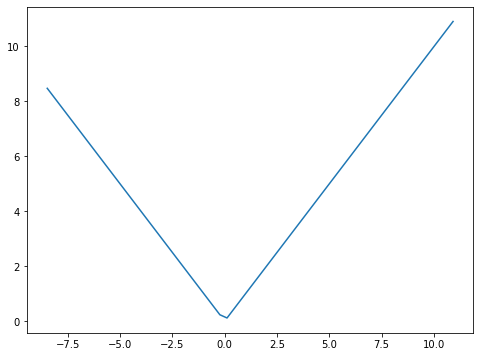

In [29]:
# first attempt at plotting those values against the absolute values - expecting this to be v-shaped
# https://docs.scipy.org/doc/numpy-1.6.0/reference/generated/numpy.absolute.html
plt.plot(abs_values, np.abs(abs_values))
plt.show()

In [26]:
# that looks a bit messy - let's try sorting the list of results and plotting again
abs_values.sort()

# checking what the list looks like now
abs_values

[-8.476335657307658,
 -8.032309645290766,
 -4.317816927822882,
 -3.8674974081494327,
 -3.7053056658132935,
 -2.004972873639005,
 -1.5665652470535036,
 -1.2495615964148268,
 -0.22995115011418932,
 0.11259513263519239,
 0.45831673287692354,
 0.8992162663951007,
 1.1768979818540473,
 1.8119802408378476,
 2.1535539918943982,
 2.424791732354251,
 5.63214889890812,
 7.44964143888555,
 8.243105489192317,
 10.789203898555016,
 10.910010709975438]

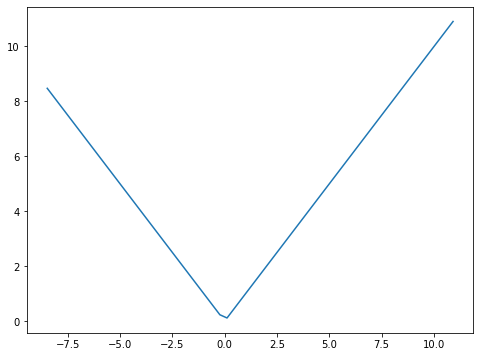

In [27]:
# now lets plot those values vs. the absolute values again
plt.plot(abs_values, np.abs(abs_values))
plt.show()

### NOTE:  
Best fit line below may not be required - keeping for now

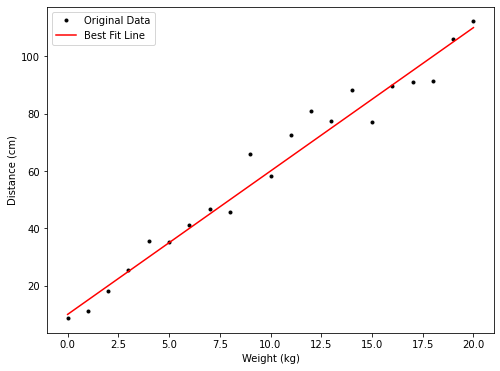

In [5]:
# Plot the best fit line

# Setting values for m & c based on above calculations
m, c = 5.0, 10.0

plt.plot(w, d, 'k.', label='Original Data')
plt.plot(w, m * w + c, 'r-', label='Best Fit Line')

# Add axis labels and legend
plt.xlabel('Weight (kg)')
plt.ylabel('Distance (cm)')
plt.legend()

# Show the plot
plt.show()

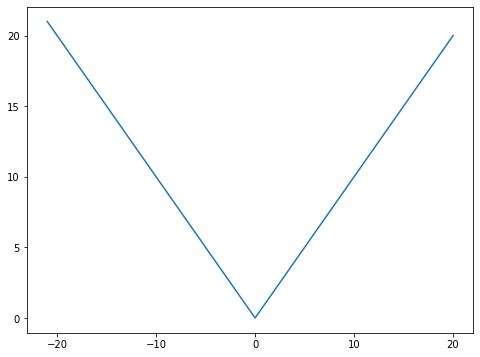

In [8]:
# Using same range as Ian for values of x
x = np.arange(-21.0, 21.0, 1.0)
plt.plot(x, np.absolute(x))
plt.show()

## Exercise 2.2  
***
*__Research and explain why the absolute value function is not typically used in fitting straight lines to data.__*

According to https://www.bradthiessen.com/html5/docs/ols.pdf:  
Mathematical difficulties: When we do not square all the values in the numerator, the positive and negative values cancel each other out and we’re always left with a value of 0, especially when using a normal distribution

From https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia:  
"I suppose you could say that absolute difference assigns equal weight to the spread of data whereas squaring emphasises the extremes. Technically though, as others have pointed out, squaring makes the algebra much easier to work with and offers properties that the absolute method does not (for example, the variance is equal to the expected value of the square of the distribution minus the square of the mean of the distribution)"

From https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia:  
"Having a square as opposed to the absolute value function gives a nice continuous and differentiable function (absolute value is not differentiable at 0) - which makes it the natural choice, especially in the context of estimation and regression analysis."